In [37]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt

In [38]:
# 観測データサイズ A, B
N_a, true_p_a = 3000, 0.05
N_b, true_p_b = 2000, 0.04
# 擬似的に観測を作成。実際のデータがあればこのステップは不要。
obs_a = np.random.binomial(1, true_p_a, N_a)
obs_b = np.random.binomial(1, true_p_b, N_b)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_b_interval__]
>Metropolis: [p_a_interval__]
100%|██████████| 25500/25500 [00:07<00:00, 3344.75it/s]
The number of effective samples is smaller than 25% for some parameters.


           mean        sd  mc_error   hpd_2.5  hpd_97.5   n_eff      Rhat
p_a    0.049965  0.005531  0.000055  0.038606  0.060468  9175.0  1.000068
p_b    0.034682  0.006624  0.000056  0.022042  0.047741  9797.0  1.000113
delta  0.015283  0.008611  0.000086 -0.002014  0.031787  9539.0  1.000202


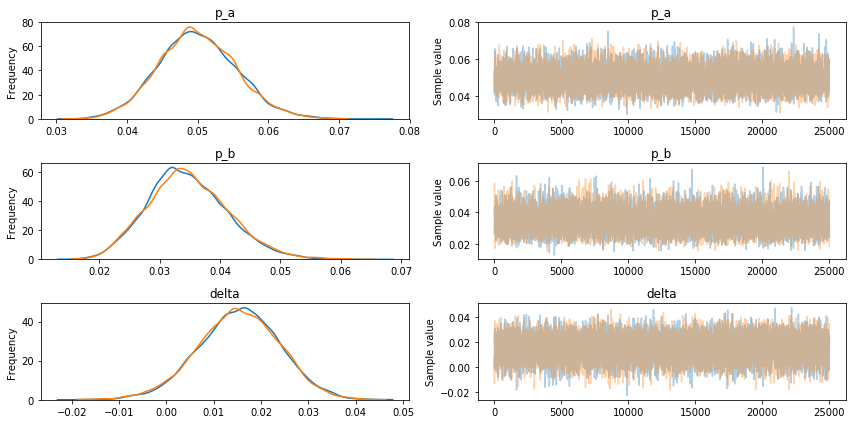

In [39]:
with pm.Model() as model:
    p_a = pm.Uniform("p_a", 0, 1)
    p_b = pm.Uniform("p_b", 0, 1)
    delta = pm.Deterministic("delta", p_a - p_b)
    model_obs_a = pm.Bernoulli("obs_a", p_a, observed=obs_a)
    model_obs_b = pm.Bernoulli("obs_b", p_b, observed=obs_b)
    step = pm.Metropolis()
    trace = pm.sample(25000, step=step, njobs=2, chains=2)
    burn = trace[1000:]
print(pm.summary(trace))
pm.traceplot(trace)
plt.show()

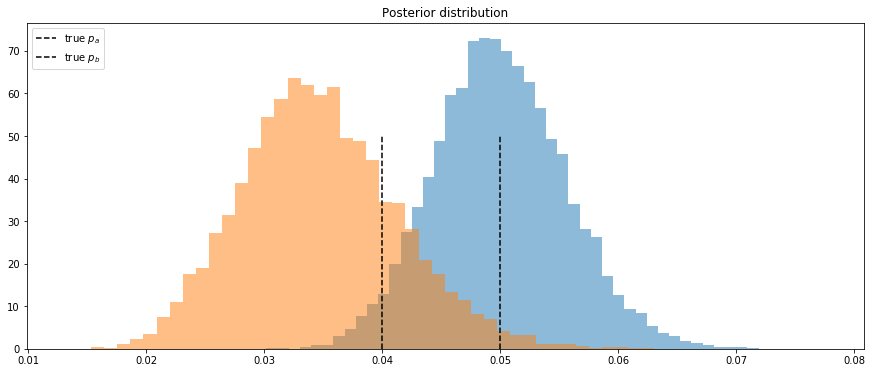

In [40]:
p_a_samples = burn["p_a"]
p_b_samples = burn["p_b"]
plt.figure(figsize=(15, 6))
plt.title("Posterior distribution")
plt.vlines(true_p_a, 0, 50, linestyle="--", label="true $p_a$")
plt.vlines(true_p_b, 0, 50, linestyle="--", label="true $p_b$")
plt.hist(p_a_samples, bins=50, histtype="stepfilled", normed=True, alpha=0.5)
plt.hist(p_b_samples, bins=50, histtype="stepfilled", normed=True, alpha=0.5)
plt.legend()
plt.show()

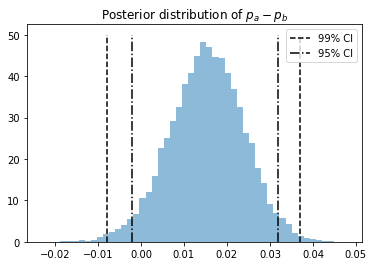

0.9593125


In [50]:
delta_samples = burn["delta"]
plt.title("Posterior distribution of $p_a-p_b$")
plt.hist(delta_samples, bins=50, histtype="stepfilled", normed=True, alpha=0.5)
CI_99 = pm.stats.hpd(delta_samples, alpha=0.01)
CI_95 = pm.stats.hpd(delta_samples, alpha=0.05)
plt.vlines(CI_99[0], 0, 50, linestyle="--", label="99% CI")
plt.vlines(CI_99[1], 0, 50, linestyle="--")
plt.vlines(CI_95[0], 0, 50, linestyle="-.", label="95% CI")
plt.vlines(CI_95[1], 0, 50, linestyle="-.")
plt.legend()
plt.show()

print((delta_samples>0).sum()/len(delta_samples))